<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python as well as k-learn and its clustering methods and datetime for date functions.
from datetime import date
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import altair as alt
import seaborn as sns

hr = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv")

In [ ]:
# created new datetime object collumns
hr['dateHireObj'] = pd.to_datetime(hr['DateofHire'])
hr['dateTermObj'] = pd.to_datetime(hr['DateofTermination'])

In [ ]:
# filling in workers who had not be terminated with today's date
ct = date.today()
temp = hr.select_dtypes(include=['datetime'])
hr[temp.columns] = temp.fillna(pd.to_datetime(ct))

In [ ]:
# create months worked column
hr['monthsWorked'] = (hr['dateTermObj'].dt.year - hr['dateHireObj'].dt.year) * 12 + (hr['dateTermObj'].dt.month - hr['dateHireObj'].dt.month)


In [ ]:
# normalize the first employee engagement survey so the numbers match the satisfaction survey
hr['EngagementSurvey'] = hr['EngagementSurvey'] * 10

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1a6a0320>,
                 k=None, metric=None, model=None, timings=True)

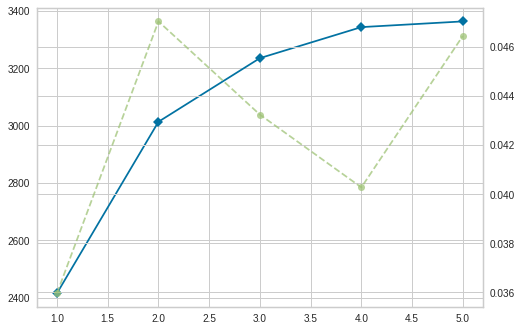

In [ ]:
# make some clusters
model = KMeans()
vis = KElbowVisualizer(model, k=(1,6))
vis.fit(hr[['EngagementSurvey', 'EmpSatisfaction2', 'monthsWorked']])

In [ ]:
# creating our labels from our clusters
kmeans = KMeans(n_clusters = 3)
hr['label'] = kmeans.fit_predict(hr[['monthsWorked', 'EngagementSurvey', 'EmpSatisfaction2']])

In [ ]:
# creating a graph based on the employee's engagement and time at the office
engagement = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EngagementSurvey',
    color='label:N'
)

engagement

alt.Chart(...)

In [ ]:
satisfaction = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EmpSatisfaction2',
    color='label:N'
)

satisfaction

alt.Chart(...)

In [ ]:
engagement | satisfaction

alt.HConcatChart(...)